# Imports

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

# Reading Datasheet

In [127]:
#Spreadsheet file name
file = 'Datasets.xlsx'

#Load spreadsheet
data = pd.read_excel(file)

#Load Dataset 1 into DataFrame
ds1 = pd.read_excel(file, sheetname = 'Dataset 1',index_col=0)


# Filling Missing Values

In [128]:
ds1.fillna(ds1.median(), inplace=True)
ds1.head()

,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,BA,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
Athlete,,,,,,,,,,,,,,,,,,,,,
1,36,5.0,1,7,13.0,85,90,90,85.775,84.750000,...,95,90.0,95.0,90.0,95.0,88.385,87.0,83,90.0,90.0
2,50,5.0,1,7,13.0,95,92,95,85.635,84.750000,...,95,84.0,87.0,84.0,95.0,88.385,87.0,85,90.0,90.0
3,41,5.0,1,7,13.0,85,85,85,85.425,84.750000,...,95,88.0,88.0,88.0,95.0,88.385,85.0,90,90.0,90.0
4,60,1.0,1,10,29.0,90,80,90,88.000,88.333333,...,95,85.0,85.0,85.0,93.0,89.385,70.0,95,90.0,95.0
5,22,1.0,1,10,29.0,90,90,85,87.300,88.333333,...,95,70.0,65.0,85.0,93.0,89.385,90.0,82,85.0,93.0


# Normalizing

In [129]:
min_max_scaler = preprocessing.MinMaxScaler()
ds1[ds1.columns[5:90]] = min_max_scaler.fit_transform(ds1[ds1.columns[5:90]])
ds1_normalized = pd.DataFrame(ds1)
ds1_normalized.head()

,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,BA,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
Athlete,,,,,,,,,,,,,,,,,,,,,
1,36,5.0,1,7,13.0,0.894737,0.857143,0.875,0.584098,0.582996,...,0.95,0.827586,1.000000,0.80,1.000000,0.717413,0.733333,0.666667,0.875,0.857143
2,50,5.0,1,7,13.0,1.000000,0.914286,1.000,0.576394,0.582996,...,0.95,0.620690,0.733333,0.56,1.000000,0.717413,0.733333,0.722222,0.875,0.857143
3,41,5.0,1,7,13.0,0.894737,0.714286,0.750,0.564839,0.582996,...,0.95,0.758621,0.766667,0.72,1.000000,0.717413,0.666667,0.861111,0.875,0.857143
4,60,1.0,1,10,29.0,0.947368,0.571429,0.875,0.706530,0.757085,...,0.95,0.655172,0.666667,0.60,0.978947,0.767740,0.166667,1.000000,0.875,1.000000
5,22,1.0,1,10,29.0,0.947368,0.857143,0.750,0.668012,0.757085,...,0.95,0.137931,0.000000,0.60,0.978947,0.767740,0.833333,0.638889,0.750,0.942857


# Visualization

In [130]:
#Reading a col
##ds1.loc[:,'NN']


Heatmap correlation

In [131]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] <= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    

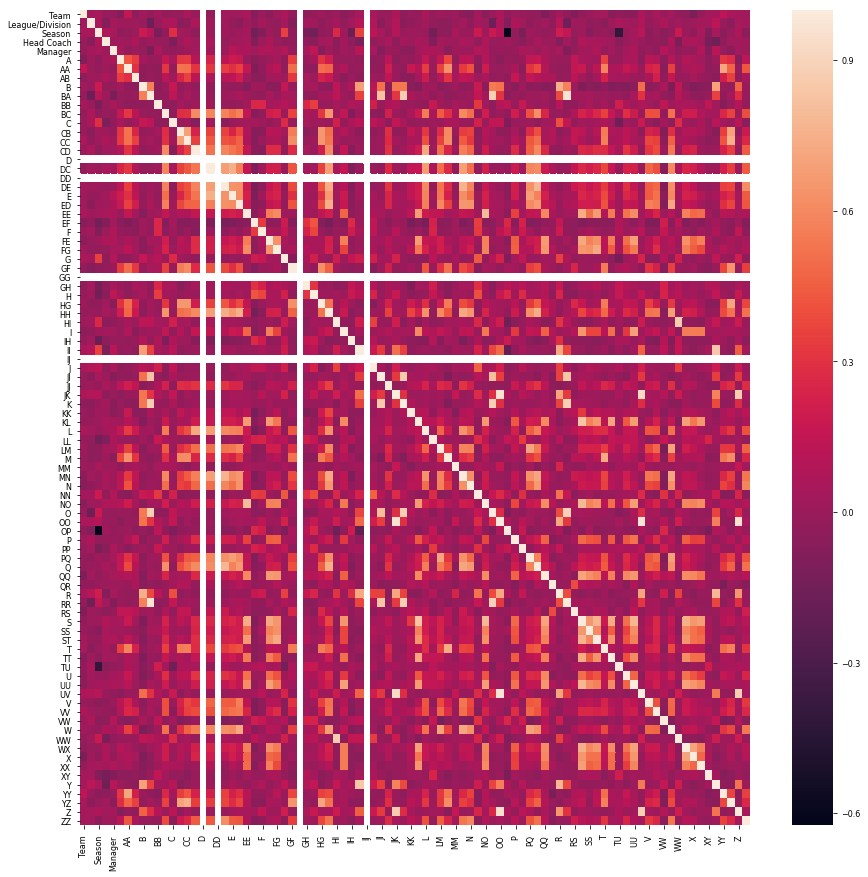

In [133]:
#Correlation matrix
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(ds1.corr())


In [ ]:
#Keep high correlation in white >0.9


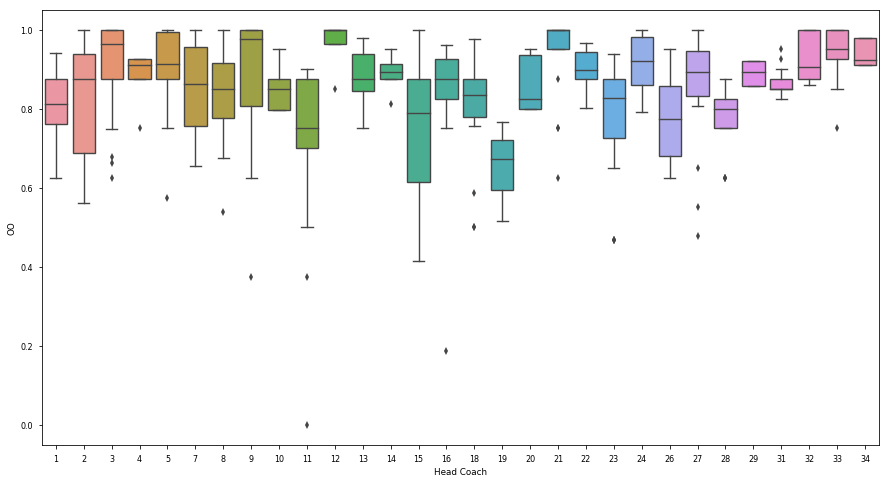

In [36]:
#2. Plot feature “OO” with respect to “Head coach”.
plt.figure(figsize=(15,8))
#sns.swarmplot(x="Head Coach", y="OO", data=ds1)
sns.boxplot(x="Head Coach", y="OO", data=ds1);

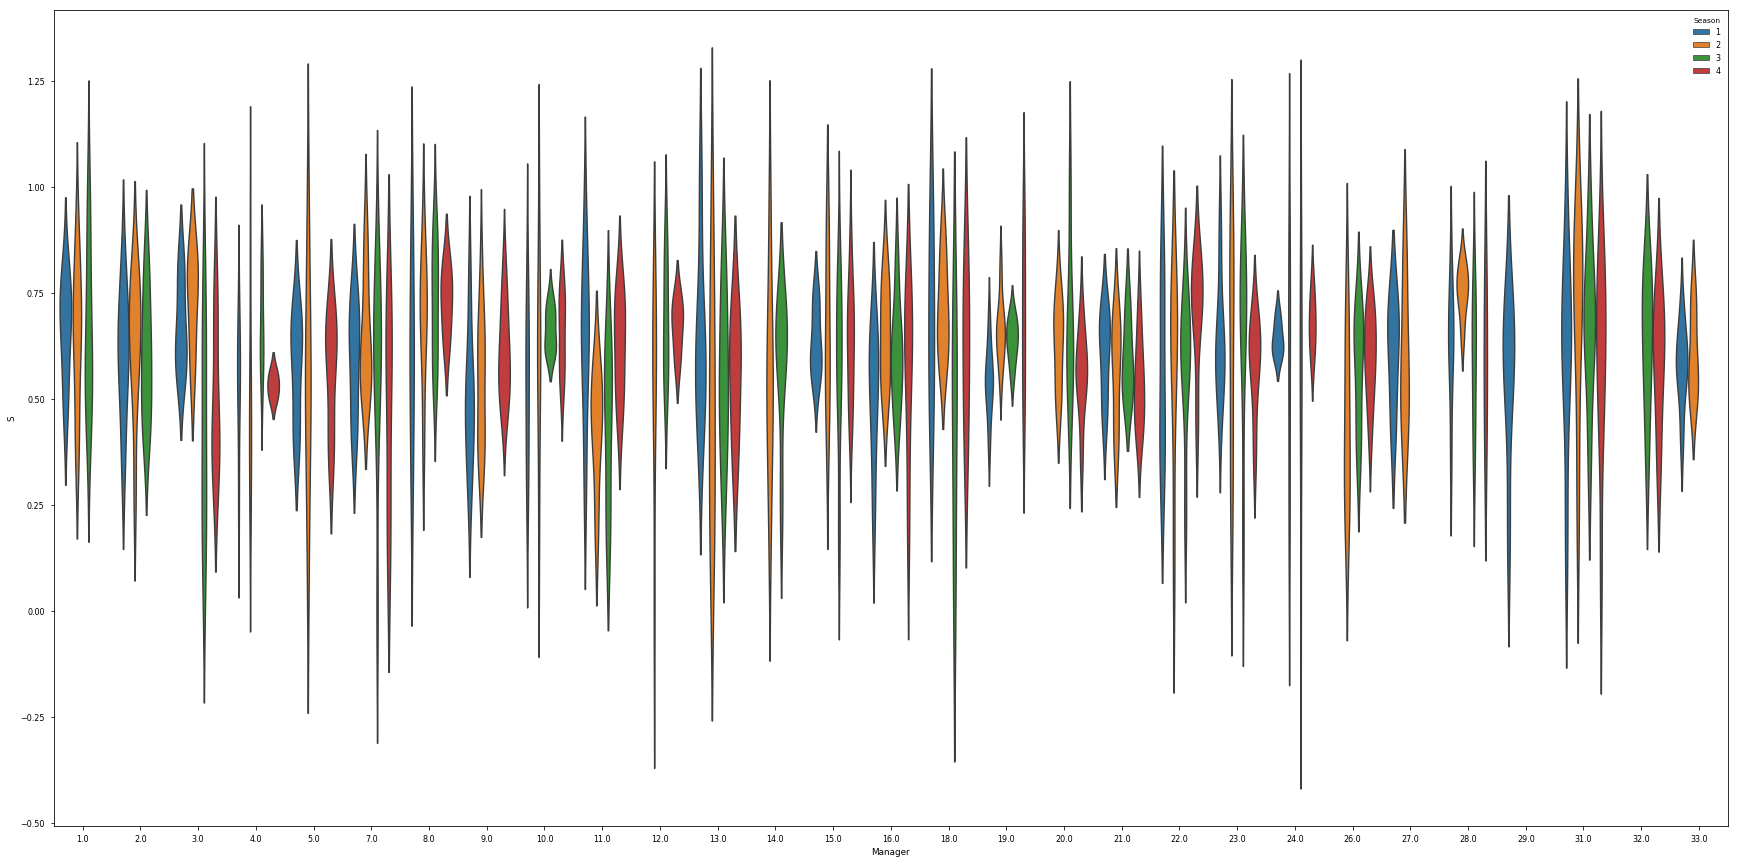

In [68]:
#3. Plot feature “S” with respect to “Manager” and “Season”.
#another categorical var
plt.figure(figsize=(30,15))
sns.violinplot(x="Manager", y="S", hue="Season", data=ds1, inner=None)


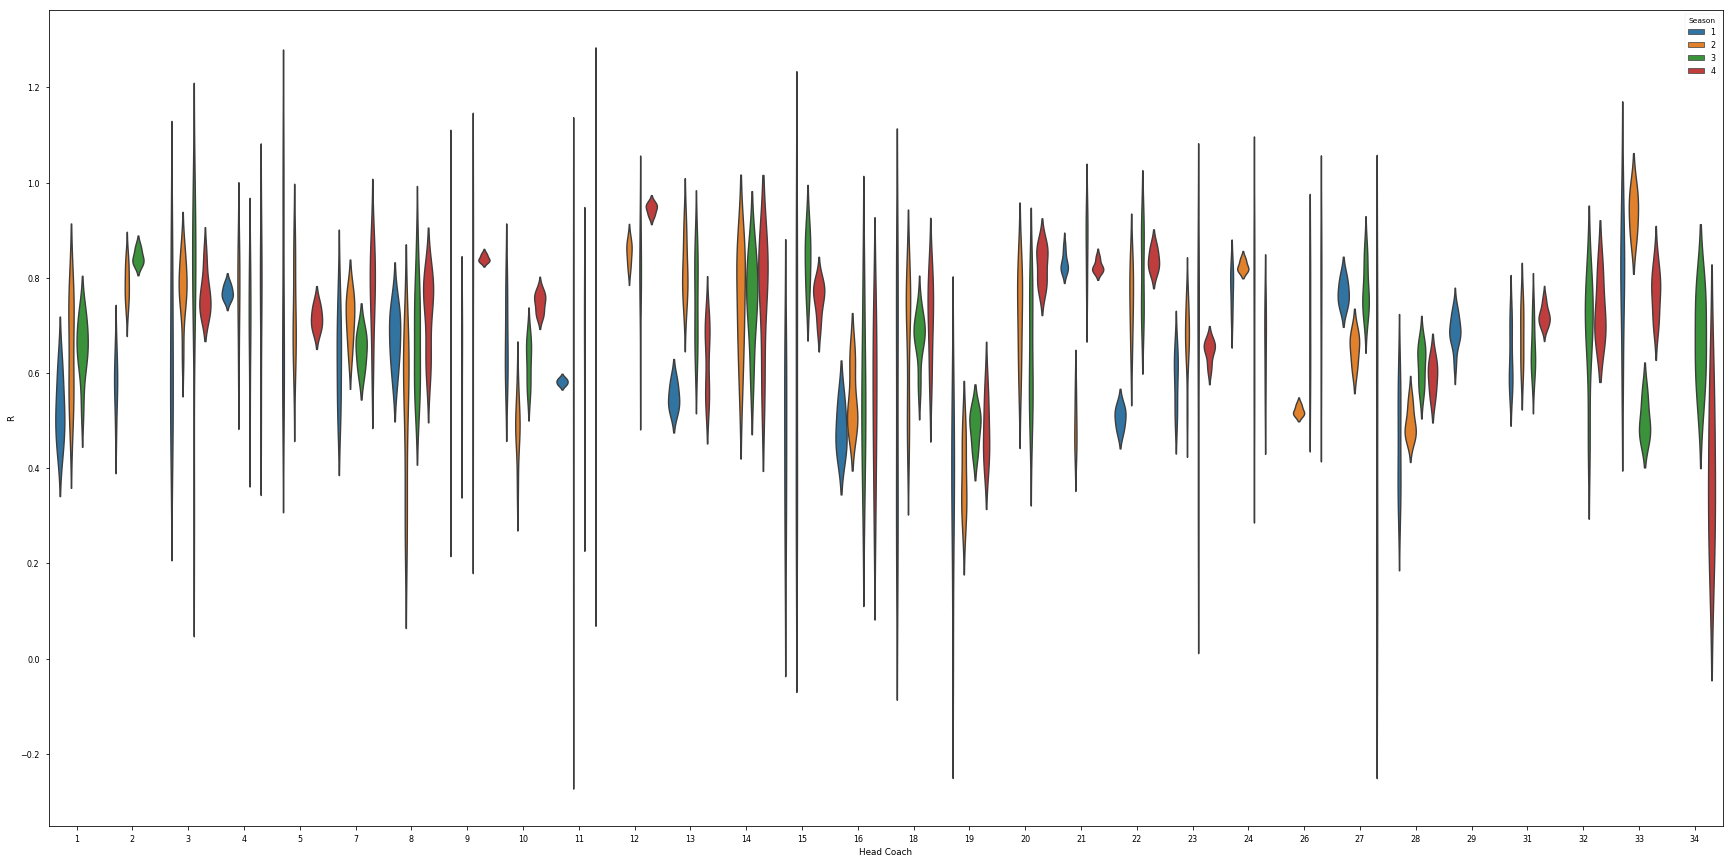

In [51]:
#4. Plot feature “R” with respect to “Head coach” and “Season”.
plt.figure(figsize=(30,15))
sns.violinplot(x="Head Coach", y="R", hue="Season", data=ds1, inner=None)

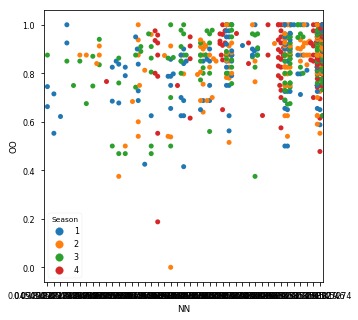

In [65]:
#5. Plot feature “NN” with respect to “OO” and “Season”.
plt.figure(figsize=(5,5))
sns.swarmplot(x="NN", y="OO", hue="Season", data=ds1)

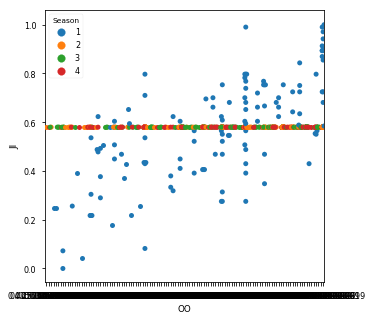

In [66]:
#6. Plot feature “OO” with respect to “JI” and “Season”.
plt.figure(figsize=(5,5))
sns.swarmplot(x="OO", y="JI", hue="Season", data=ds1)

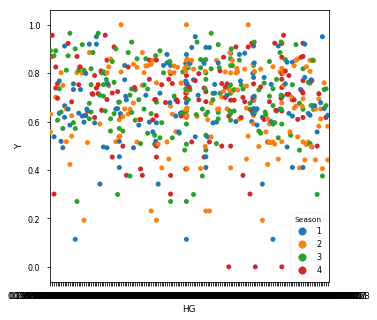

In [67]:
#7. Plot feature “HG” with respect to “Y” and “Season”.
plt.figure(figsize=(5,5))
sns.swarmplot(x="HG", y="Y", hue="Season", data=ds1)

In [14]:
#8. Plot feature “B” with respect to “League/Division” and “Season” for the data instances
#without missing values in the “League/Division” feature.